In [ ]:
'''Comparing simulation under the poisson and negative binomial tau leaping'''

In [ ]:
from epymorph.kit import *
from epymorph.adrio import acs5, commuting_flows, us_tiger
import matplotlib.pyplot as plt 
import numpy as np

rume = SingleStrataRUME.build(
    # Load the Pei IPM
    ipm=ipm.SIRH(),
    # Load the Pei MM
    mm=mm.Centroids(),
    # Describe the geographic scope of our simulation:
    scope=StateScope.in_states(["AZ"], year=2015),
    # Create a SingleLocation initializer
    init=init.SingleLocation(location=0, seed_size=100),
    # Set the time-frame to simulate
    time_frame=TimeFrame.of("2015-01-01", 300),
    # Provide model parameter values
    params={
        "beta":0.2,
        "gamma":0.1,
        "xi":1/90,
        "hospitalization_prob":1/1000,
        "hospitalization_duration":5,
        "commuter_proportion":0.50,
        "phi":100,
        "R":5,
        # Geographic data can be loaded using ADRIOs
        "centroid": us_tiger.InternalPoint(),
        "population": acs5.Population(),
    },
)

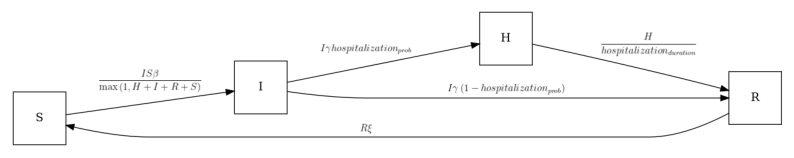

In [24]:
rume.ipm.diagram()

In [25]:
from epymorph.forecasting.multi_simulator_nb import MultiSimulatorNB,MultiSimulatorPoisson

num_realizations = 100

sim_nb = MultiSimulatorNB()
out_nb = sim_nb.run(
    rume=rume,
    num_realizations=num_realizations,
    param_values=None,
    initial_values=None
)

sim_p = MultiSimulatorPoisson()
out_p = sim_p.run(
    rume=rume,
    num_realizations=num_realizations,
    param_values=None,
    initial_values=None
)

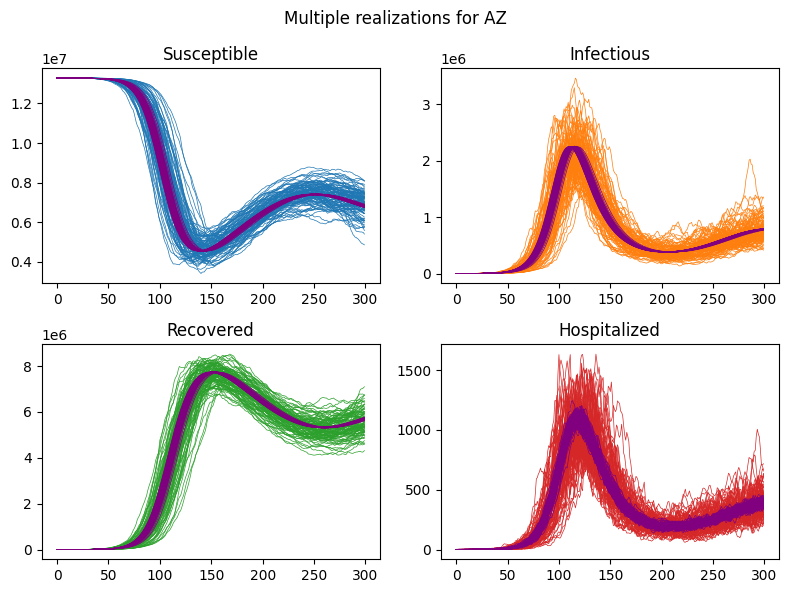

In [26]:
data_nb = np.sum(out_nb.visit_compartments.reshape(100,300,2,1,4),axis = 2)
data_p = np.sum(out_p.visit_compartments.reshape(100,300,2,1,4),axis = 2)

node = 0
alpha = 1
ticks = np.arange(rume.time_frame.duration_days)
names = ["Susceptible", "Infectious", "Recovered", "Hospitalized"]
colors_nb = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.set_figheight(6)
axs = np.ravel(axs)
for q_idx in range(len(axs)):
    ax = axs[q_idx]
    tx = ticks
    ax.plot(
        tx,
        data_nb[:, :, node, q_idx].T,
        color=colors_nb[q_idx],
        linewidth=0.5,
    )
    ax.plot(
        tx,
        data_p[:, :, node, q_idx].T,
        color='purple',
        linewidth=0.5,
    )
    ax.set_title(names[q_idx])

fig.suptitle(f"Multiple realizations for {rume.scope.labels[node]}")
fig.tight_layout()
plt.show()